In [140]:
import tensorflow._api.v2.compat.v1 as tf
import numpy as np
tf.disable_v2_behavior()
from PIL import Image 
# print('Pillow Version:', PIL.__version__)
from numpy import asarray

import matplotlib.pyplot as plt

In [141]:
# variables
features = 8
hidden_layer_nodes = 20
categories = 25
x = tf.placeholder(tf.float32, [None, features])
y = tf.placeholder(tf.float32, [None, categories])
w1 = tf.Variable(tf.truncated_normal([features,hidden_layer_nodes], stddev=0.1))
b1 = tf.Variable(tf.constant(0.1, shape=[hidden_layer_nodes]))
z1 = tf.nn.relu(tf.matmul(x,w1)+b1)
w2 = tf.Variable(tf.truncated_normal([hidden_layer_nodes,categories], stddev=0.1))
b2 = tf.Variable(0.)
z2 = tf.matmul(z1,w2) + b2

# functions
# pred = 1 / (1.0 + tf.exp(-z2))
# loss = tf.reduce_mean(-(y * tf.log(pred) + (1 - y) * tf.log( 1 - pred)))

pred = tf.nn.softmax(z2) # softMax function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(y, z2))
# loss = -tf.reduce_mean(y*tf.log(pred)) # Average cross entropy loss
alfa = 0.001
# update = tf.train.GradientDescentOptimizer(alfa).minimize(loss)

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred), reduction_indices=[1]))
update = tf.train.GradientDescentOptimizer(alfa).minimize(cross_entropy)



## data function


In [142]:
def YtoArr(y):
    arr = []
    for i in y:
        tmp = []
        for j in range(25):
            if (int(i/10) == j) :
                tmp.append(1)
            else :
                tmp.append(0)
        arr.append(tmp)
    return arr

def get_XY_from_image(photo_name:str,color:int,jumps:int=100,show:bool=False):
    data = asarray(Image.open(photo_name))
    color_arr = data[:,:,color]
    image_color_arr = Image.fromarray(color_arr)
    if show: image_color_arr.show()
    data_x = []
    data_y = []
    print(f"pic size: {len(color_arr)}x{len(color_arr[0])} name: {photo_name}")
    for i in range(1,len(color_arr)-1,jumps):
        for j in range(1,len(color_arr[0])-1):
            temp_y = [color_arr[i][j]]
            temp_x = [color_arr[i-1][j-1],color_arr[i-1][j],color_arr[i][j-1],color_arr[i+1][j],color_arr[i][j+1],color_arr[i+1][j+1],color_arr[i-1][j+1],color_arr[i+1][j-1]]
            data_y.append(temp_y)
            data_x.append(temp_x)
    return (data_x,data_y)

def load_pic_data(pics_array,color:int,jumps:int=100,show:bool=False):
    data_x , data_y = get_XY_from_image(pics_array[0],color,jumps,show)
    for i in pics_array[1:]:
        data_tmp_x , data_tmp_y = get_XY_from_image(i,color,jumps,show)
        data_x = np.append(data_x,data_tmp_x,axis=0)
        data_y = np.append(data_y,data_tmp_y,axis=0)
    data_x = np.array(data_x)
    data_y = np.array(data_y)
    return data_x,data_y

## data

In [143]:
data_x , data_y = load_pic_data(
    ["data/cat_test.jpg", "data/balloon.jpg","data/cat.jpg","data/city.jpg",
    "data/city_night.jpg","data/city_color.jpg",
    "data/flower.jpg"],
    color=0,jumps=100)
data_t_x , data_t_y = load_pic_data(["data/park.jpg"],color=1,jumps=100)
# print(data_t_y)
# print(YtoArr(data_t_y))
data_y = YtoArr(data_y)
data_t_y = YtoArr(data_t_y)


pic size: 681x1024 name: data/cat_test.jpg
pic size: 480x720 name: data/balloon.jpg
pic size: 576x1024 name: data/cat.jpg
pic size: 664x1080 name: data/city.jpg
pic size: 1282x2278 name: data/city_night.jpg
pic size: 539x959 name: data/city_color.jpg
pic size: 600x800 name: data/flower.jpg
pic size: 588x830 name: data/park.jpg


In [144]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

show = 10
loss_in_time = []
w_arr = []
w2_arr = []
test_over_time = []
accuracy_over_time = []

correct_prediction = tf.equal(tf.argmax(pred,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for i in range(0,1000):
       sess.run(update, feed_dict = {x:data_x, y:data_y})
       if(i%show==0 and i>21):
              tmp = sess.run(loss,feed_dict={x:data_x,y:data_y})
              loss_in_time.append(tmp)
              w_arr.append(sess.run(w1))
              w2_arr.append(sess.run(w2))
              if(i%(show*1)==0):
                     print(f"i = {i}, loss = {tmp},")
              accuracy_over_time.append(sess.run(accuracy, feed_dict={x:data_t_x,y:data_t_y}))
              test_over_time.append(sess.run(loss,feed_dict={x:data_t_x,y:data_t_y}))




i = 30, loss = 3.2742116451263428,
i = 40, loss = 3.2564988136291504,
i = 50, loss = 3.2475194931030273,
i = 60, loss = 3.2407867908477783,
i = 70, loss = 3.2352147102355957,
i = 80, loss = 3.2303547859191895,
i = 90, loss = 3.2260186672210693,
i = 100, loss = 3.222085952758789,
i = 110, loss = 3.218432664871216,
i = 120, loss = 3.2149691581726074,
i = 130, loss = 3.2116875648498535,
i = 140, loss = 3.20853590965271,
i = 150, loss = 3.2055256366729736,
i = 160, loss = 3.2026326656341553,
i = 170, loss = 3.1998207569122314,
i = 180, loss = 3.197072744369507,
i = 190, loss = 3.1944005489349365,
i = 200, loss = 3.191805362701416,


KeyboardInterrupt: 

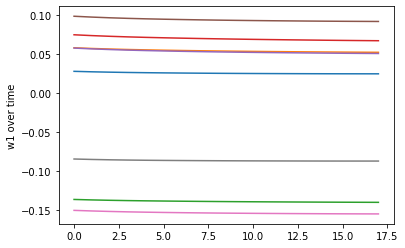

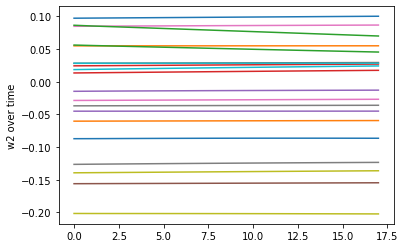

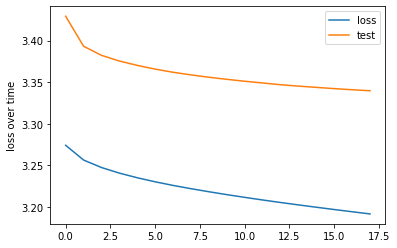

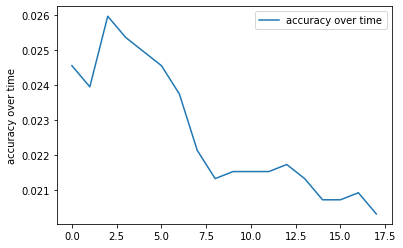

In [145]:
d = np.array(np.array(w_arr).transpose()[0]).transpose()
plt.plot(d)
plt.ylabel('w1 over time')
plt.show()

d = np.array(np.array(w2_arr).transpose()[0]).transpose()
plt.plot(d)
plt.ylabel('w2 over time')
plt.show()

plt.plot(loss_in_time,label ="loss")
plt.plot(test_over_time , label ="test")
plt.legend()
plt.ylabel('loss over time')
plt.show()

plt.plot(accuracy_over_time,label ="accuracy over time")
plt.legend()
plt.ylabel('accuracy over time')
plt.show()

In [ ]:
pic,_ = load_pic_data(["data/cat.jpg"],color=0,jumps=1)
p = sess.run(pred,feed_dict={x:pic})
print(p)
picture = []
for line in p:
    max_pos = 0
    tmp_max = 0
    # print(np.max(line))
    for i,num in enumerate(line):
        if(num>tmp_max):
            max_pos = i
            tmp_max = num
    # print(tmp_max)
    color_tmp = max_pos*10
    picture.append(color_tmp)
size_x = 576
size_y = 1024
data_R = np.reshape(picture,(size_x-2,size_y-2))

img = Image.fromarray(data_R)
img.show(title="calculated")
print(picture)




pic size: 576x1024 name: data/cat.jpg
[[0.05447678 0.02364367 0.04414612 ... 0.03721039 0.0244421  0.01914719]
 [0.05248144 0.02323855 0.04497774 ... 0.03657451 0.02274394 0.01895321]
 [0.0530699  0.02379492 0.04374551 ... 0.03653008 0.02413738 0.01820262]
 ...
 [0.05087833 0.02467688 0.04440235 ... 0.04017111 0.0273893  0.01917165]
 [0.04864847 0.02618757 0.045618   ... 0.0384352  0.02767013 0.01852584]
 [0.04753968 0.02653709 0.04574325 ... 0.03724978 0.03001402 0.01749458]]
[120, 120, 120, 120, 50, 50, 120, 120, 50, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 50, 50, 120, 120, 50, 120, 120, 120, 50, 120, 120, 120, 120, 120, 120, 120, 50, 120, 50, 120, 120, 120, 120, 120, 120, 50, 50, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 50, 120, 120, 120, 50, 120, 120, 120, 120, 120, 120, 120, 120, 120, 50, 120, 120, 120, 50, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 12